In [16]:
import numpy as np
import phate
import scprep
import pandas as pd
from sklearn.model_selection import train_test_split
import sys
sys.path.append('../src')
from preprocess import get_data_dict

In [17]:
data = np.load('../data/old2/sea_ad_gaba.npz')

In [18]:
data_dict = {name: data[name] for name in data.files}

<Axes: >

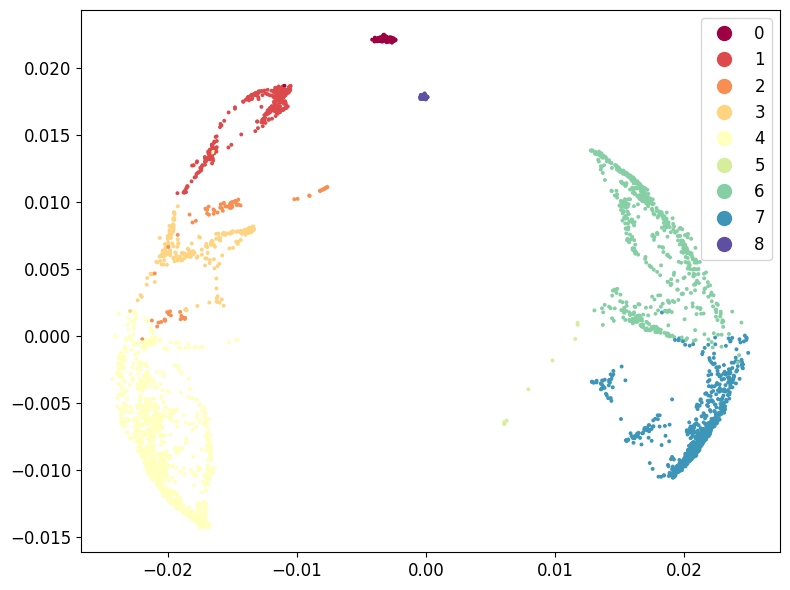

In [19]:
scprep.plot.scatter2d(data_dict['phate'], c=data_dict['colors'], cmap='Spectral', figsize=(8, 6))

In [20]:
X = data_dict['data']
colors = data_dict['colors']

In [21]:
ids = np.arange(0, X.shape[0])
X_train, X_test, color_train, color_test, id_train, id_test = train_test_split(X, colors, ids, test_size=0.2, random_state=42)

In [22]:
is_train = np.isin(ids, id_train)

<Axes: >

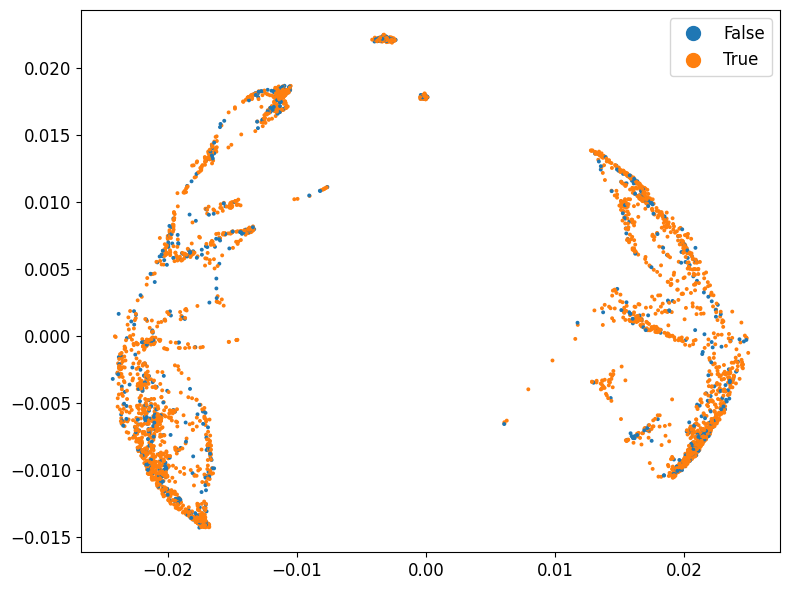

In [23]:
scprep.plot.scatter2d(data_dict['phate'], c=is_train, figsize=(8, 6))

<Axes: >

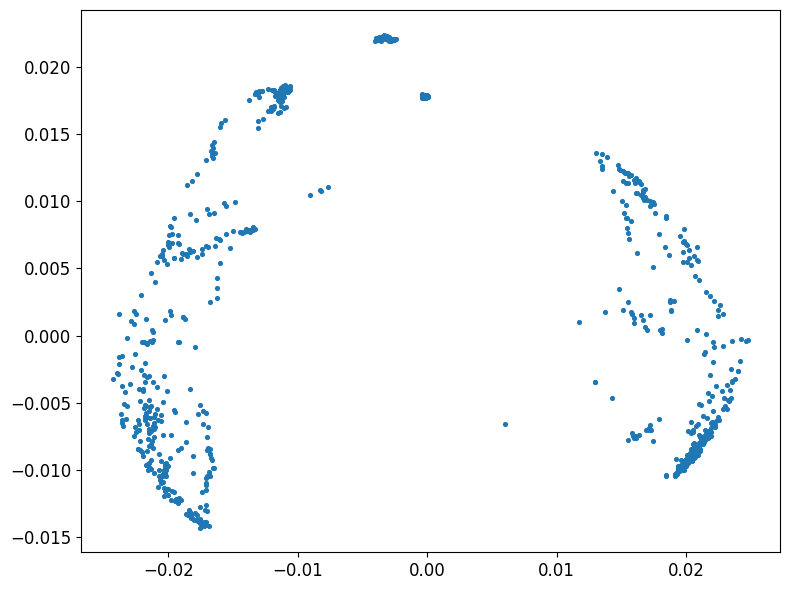

In [24]:
scprep.plot.scatter2d(data_dict['phate'][id_test], figsize=(8, 6))

In [25]:
data_dict_train = get_data_dict(X_train, color_train)

Calculating PHATE...
  Running PHATE on 3028 observations and 100 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 1.12 seconds.
    Calculating affinities...
    Calculated affinities in 0.83 seconds.
  Calculated graph and diffusion operator in 1.96 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.30 seconds.
    Calculating KMeans...
    Calculated KMeans in 3.60 seconds.
  Calculated landmark operator in 4.83 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.58 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.66 seconds.
Calculated PHATE in 12.05 seconds.


<Axes: >

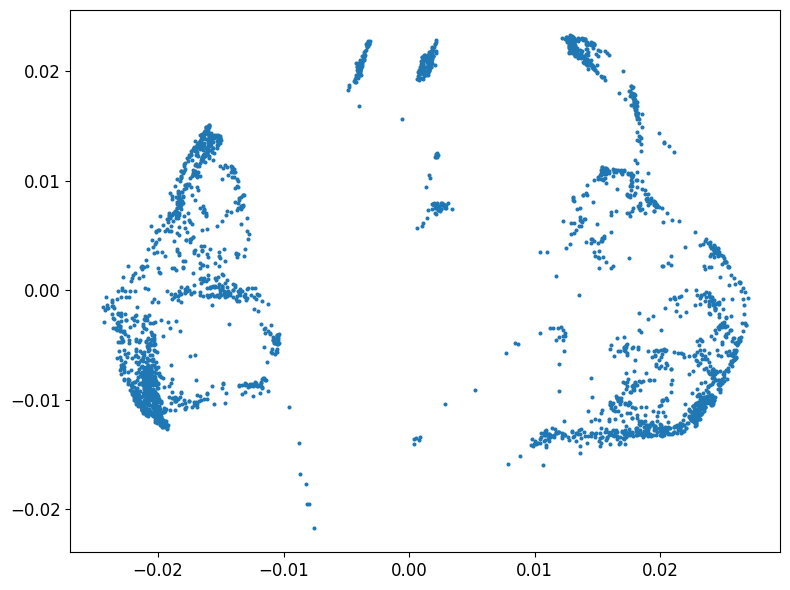

In [26]:
scprep.plot.scatter2d(data_dict_train['phate'], figsize=(8, 6))

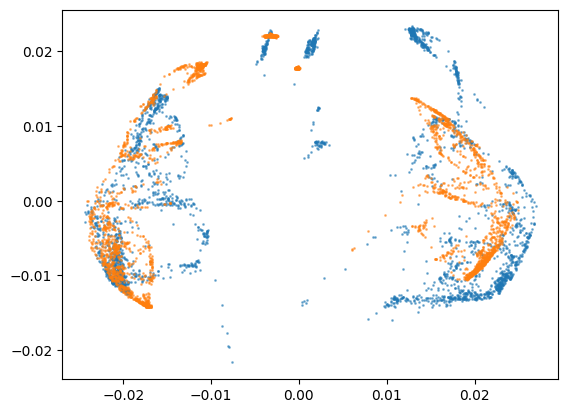

In [27]:
import matplotlib.pyplot as plt
plt.scatter(*data_dict_train['phate'].T, alpha=0.5, s=1)
plt.scatter(*data_dict['phate'][id_train].T, alpha=0.5, s=1)

In [28]:
data_dict_test = dict(
    data=X_test,
    colors=color_test,
    dist=np.zeros((X_test.shape[0], X_test.shape[0]))*np.nan,
    phate=data_dict['phate'][id_test]
)

In [29]:
data_dict['is_train'] = is_train

In [30]:
np.savez('../data/sea_ad_gaba_all.npz', **data_dict)
np.savez('../data/sea_ad_gaba.npz', **data_dict_train)
np.savez('../data/sea_ad_gaba_test.npz', **data_dict_test)